<a href="https://colab.research.google.com/github/julianepping/projekt-stud/blob/main/Model_Export.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modell trainieren

170508288/170498071 [==============================] - 3s 0us/step
Epoch 1/10
782/782 [==============================] - 21s 11ms/step - loss: 1.3932 - accuracy: 0.4972 - val_loss: 1.1929 - val_accuracy: 0.5713
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 0.9910 - accuracy: 0.6492 - val_loss: 1.0220 - val_accuracy: 0.6469
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 0.8331 - accuracy: 0.7103 - val_loss: 0.8347 - val_accuracy: 0.7180
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 0.7463 - accuracy: 0.7397 - val_loss: 0.7983 - val_accuracy: 0.7285
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 0.6775 - accuracy: 0.7640 - val_loss: 0.6793 - val_accuracy: 0.7650
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 0.6276 - accuracy: 0.7815 - val_loss: 0.9452 - val_accuracy: 0.6871
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 0.58

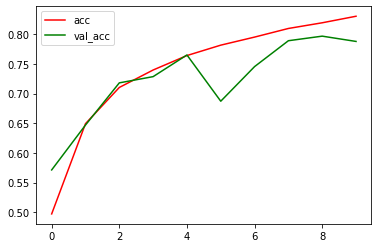

In [ ]:
#importing libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tf2onnx
import onnx
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization, Conv2D
from tensorflow.keras.layers import MaxPool2D, Activation, MaxPooling2D

#loading dataset
cifar = keras.datasets.cifar10 
(X_train, y_train), (X_test, y_test) = cifar.load_data()

#defining labels
label = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
            'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

#rescaling data between 0-1
X_train = X_train/255.0
X_test = X_test/255.0

#buiding model
model = Sequential()

model.add(Conv2D(32,activation = 'relu',kernel_size = (3,3 )))
model.add(BatchNormalization())
model.add(Conv2D(32,activation = 'relu',kernel_size = (3,3 )))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(64,activation = 'relu',kernel_size = (3,3 )))
model.add(BatchNormalization())
model.add(Conv2D(64,activation = 'relu',kernel_size = (3,3 )))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(128,activation = 'relu',kernel_size = (3,3 )))
model.add(BatchNormalization())
model.add(Conv2D(128,activation = 'relu',kernel_size = (3,3 )))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Flatten(input_shape = (32,32,3)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

#compilation of  model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
              
#fitting model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, verbose=1)

# evaluate model
_, acc = model.evaluate(X_test, y_test)
print('> %.3f' % (acc * 100.0))	


#save modell
input_signature = [tf.TensorSpec([None, 32, 32, 3], tf.float32, name='x')]
onnx_model, _ = tf2onnx.convert.from_keras(model, input_signature)
!mkdir -p saved_model
onnx.save(onnx_model, "saved_model/my_model")


plt.plot(history.history['accuracy'], label='acc', color='red')
plt.plot(history.history['val_accuracy'], label='val_acc', color='green')
plt.legend()




Wahrscheinlichkeiten zu einem Bild hervorsagen

In [ ]:
onnx_model = onnx.load("saved_model/my_model")
# predicting lable for test_images


pic = 100

plt.figure()
plt.imshow(X_test[pic])

j = 0

for i in label:
    print(i + ': ' + str(predictions[pic][j]))
    j = j+1

print("Label in dataset: %s" % (y_test[pic][0]))

Airplane: 4.7496567e-05
Automobile: 8.192321e-07
Bird: 0.012074408
Cat: 0.002119548
Deer: 0.9472848
Dog: 0.016146462
Frog: 5.068748e-05
Horse: 0.022258073
Ship: 1.045685e-05
Truck: 7.1613e-06
Label in dataset: 4


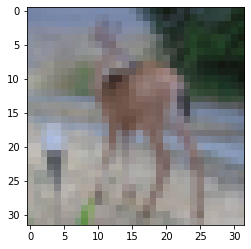

In [ ]:

# predicting lable for test_images
predictions=model.predict(X_test)

pic = 100

plt.figure()
plt.imshow(X_test[pic])

j = 0

for i in label:
    print(i + ': ' + str(predictions[pic][j]))
    j = j+1

print("Label in dataset: %s" % (y_test[pic][0]))

Data Augmention

Epoch 1/10
781/781 [==============================] - 26s 32ms/step - loss: 0.7208 - accuracy: 0.7522 - val_loss: 0.6161 - val_accuracy: 0.7917
Epoch 2/10
781/781 [==============================] - 28s 36ms/step - loss: 0.6890 - accuracy: 0.7622 - val_loss: 0.6395 - val_accuracy: 0.7821
Epoch 3/10
781/781 [==============================] - 25s 32ms/step - loss: 0.6724 - accuracy: 0.7674 - val_loss: 0.6098 - val_accuracy: 0.7880
Epoch 4/10
781/781 [==============================] - 26s 33ms/step - loss: 0.6497 - accuracy: 0.7768 - val_loss: 0.6459 - val_accuracy: 0.7840
Epoch 5/10
781/781 [==============================] - 25s 32ms/step - loss: 0.6306 - accuracy: 0.7802 - val_loss: 0.5453 - val_accuracy: 0.8132
Epoch 6/10
781/781 [==============================] - 25s 32ms/step - loss: 0.6207 - accuracy: 0.7859 - val_loss: 0.5421 - val_accuracy: 0.8149
Epoch 7/10
781/781 [==============================] - 25s 32ms/step - loss: 0.6088 - accuracy: 0.7901 - val_loss: 0.5645 - val_accuracy:

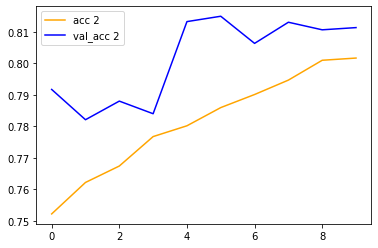

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
it_train = datagen.flow(X_train, y_train, batch_size=64)
steps = int(X_train.shape[0] / 64)
r2 = model.fit(it_train, steps_per_epoch=steps, epochs=10, validation_data=(X_test, y_test))
_, acc = model.evaluate(X_test, y_test)
print('> %.3f' % (acc * 100.0))	

plt.plot(r2.history['accuracy'], label='acc 2', color='orange')
plt.plot(r2.history['val_accuracy'], label='val_acc 2', color='blue')
plt.legend()